## Linear Regression

**Linear regression** is a statistical method used in machine learning and statistics to **model the relationship between a dependent variable and one or more independent variables** by fitting a linear equation to the observed data. The goal of linear regression is to find the best-fitting line (or hyperplane, in the case of multiple independent variables) that minimizes the difference between the predicted and actual values of the dependent variable.



In [9]:
from __future__ import absolute_import, division, print_function

In [10]:
#!pip install --upgrade tensorflow

In [11]:
import tensorflow as tf
import numpy as np
rng = np.random

In [12]:
#parameter
learning_rate = 0.01
training_steps = 1000
display_step = 50

### Training the data

In [13]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [14]:
#weight and Bias, Initialized randomly
w = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

#Linear regression(wx + b)
def linear_regression(x):
    return w * x + b

#Mean square error
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred -  y_true))

#Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [15]:
#Optimization process
def run_optimization():
    #wrap computation inside a gradientape for automatic differentiation
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        
        #compute gradient
        gradients = g.gradient(loss, [w,b])
        
        #Update w and b following gradients.
        optimizer.apply_gradients(zip(gradients,[w,b]))

In [16]:
#run training for the given number of steps.
for step in range(1, training_steps + 1):
    #run the optimization to update w and b values. 
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, w: %f, b: %f" % (step, loss, w.numpy(), b.numpy()))

step: 50, loss: 0.210571, w: 0.347105, b: 0.121961
step: 100, loss: 0.198334, w: 0.336180, b: 0.199416
step: 150, loss: 0.188737, w: 0.326505, b: 0.268007
step: 200, loss: 0.181211, w: 0.317937, b: 0.328749
step: 250, loss: 0.175309, w: 0.310350, b: 0.382540
step: 300, loss: 0.170680, w: 0.303631, b: 0.430175
step: 350, loss: 0.167050, w: 0.297680, b: 0.472359
step: 400, loss: 0.164204, w: 0.292411, b: 0.509716
step: 450, loss: 0.161971, w: 0.287745, b: 0.542798
step: 500, loss: 0.160220, w: 0.283613, b: 0.572094
step: 550, loss: 0.158847, w: 0.279953, b: 0.598037
step: 600, loss: 0.157771, w: 0.276713, b: 0.621012
step: 650, loss: 0.156926, w: 0.273843, b: 0.641357
step: 700, loss: 0.156264, w: 0.271301, b: 0.659375
step: 750, loss: 0.155745, w: 0.269051, b: 0.675330
step: 800, loss: 0.155338, w: 0.267058, b: 0.689460
step: 850, loss: 0.155018, w: 0.265293, b: 0.701972
step: 900, loss: 0.154768, w: 0.263730, b: 0.713053
step: 950, loss: 0.154572, w: 0.262346, b: 0.722866
step: 1000, l

In [17]:
import matplotlib.pyplot as plt

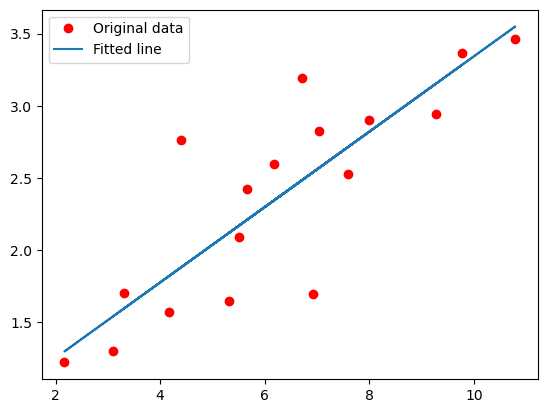

In [19]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(w * X + b), label='Fitted line')
plt.legend()
plt.show()